Train Accuracy: 100.0%
Test Accuracy: 51.162790697674424%


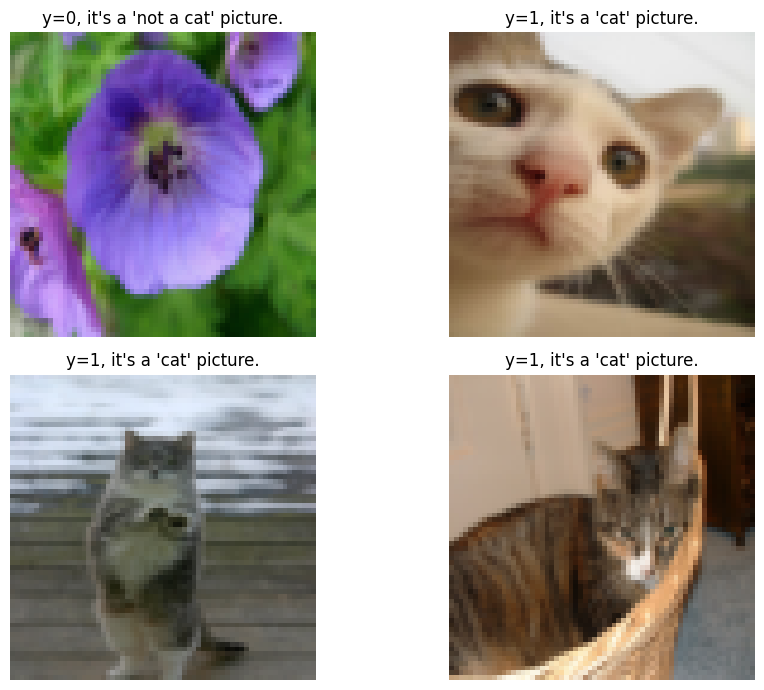

In [9]:
import h5py
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt

# Load the dataset again (assuming it's not already loaded)
train_data = h5py.File('/Users/boin/Desktop/23F/AMS595/Python2/train_catvnoncat.h5', "r")
test_data = h5py.File('/Users/boin/Desktop/23F/AMS595/Python2/test_catvnoncat.h5', "r")

train_X_all = np.array(train_data['train_set_x'][:]) / 255.0 # Normalize here if necessary.
train_Y_all = np.array(train_data['train_set_y'][:])

last_digit_student_id = 6 # Your student ID's last digit goes here.

# Split the data using the last digit of student id 
train_X= train_X_all[:160 + last_digit_student_id]
train_Y= train_Y_all[:160 + last_digit_student_id]
test_X= train_X_all[160 + last_digit_student_id:]
test_Y= train_Y_all[160 + last_digit_student_id:]

# Reshape images into 1D array and normalize if needed
train_X_reshaped = train_X.reshape(train_X.shape[0],-1)
test_X_reshaped = test_X.reshape(test_X.shape[0],-1)

model=LogisticRegression(max_iter=1000)
model.fit(train_X_reshaped, train_Y)

predictions_train=model.predict(train_X_reshaped)
predictions_test=model.predict(test_X_reshaped)

incorrect_predictions_train_indices=[i for i,(actual,predicted) in enumerate(zip(train_Y,predictions_train)) if actual!=predicted]
incorrect_predictions_test_indices=[i for i,(actual,predicted) in enumerate(zip(test_Y,predictions_test)) if actual!=predicted]

print(f"Train Accuracy: {100 - len(incorrect_predictions_train_indices)/len(train_Y)*100}%")
print(f"Test Accuracy: {100 - len(incorrect_predictions_test_indices)/len(test_Y)*100}%")

# The indices of images that we want to look at
indices_to_look_at = incorrect_predictions_test_indices[:4]

# Create figure with size (10,7)
fig=plt.figure(figsize=(10,7))

classes={0:"not a cat",1:"cat"}

for i in range(4):
    fig.add_subplot(2, 2,i+1) # subplot indices are 1-based.
    plt.imshow(test_X[indices_to_look_at[i]], cmap='gray')
    plt.axis('off')
    plt.title("y="+str(test_Y[indices_to_look_at[i]])+", it's a '"+classes[test_Y[indices_to_look_at[i]]]+"' picture.")

plt.tight_layout()
plt.show()
